In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [47]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

In [48]:
df = pd.read_csv('merged.csv',encoding="ISO-8859-1",
                 header=None,delim_whitespace=False,names=names,na_values='?',)

In [106]:
# Creating more features from given dataframe
df["screen_name_len"] = [len(i) for i in df["screen_name"]]
df["bot_is_substr"] = [int('bot' in i.lower()) for i in df["screen_name"]]
df["bot_in_des"] = [int('bot' in str(i).lower()) for i in df['description']]

# Getting the ages in years from created_at
ages = []
for i in df["created_at"]:
    if len(i) > 20:
        i = i.split()
        year = int(i[5][:4]) % 2000 
    else:
        i = i.split('/')
        year = int(i[2].split()[0]) % 2000
    age = 17-year
    ages.append(age)
df["age"] = ages


0.844012399555
0.842270298463


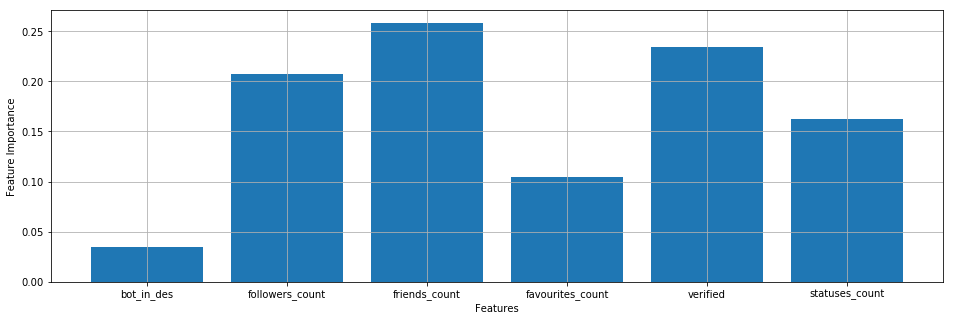

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score


dt = DecisionTreeClassifier(criterion='entropy')

# treeNames are only the numerical and binary features with importance > 0 
treeNames=['bot_in_des','followers_count','friends_count','listedcount','favourites_count','verified','statuses_count']

# Getting the training sets and fitting the tree
df_train = df[treeNames+['bot']]
x_train = df[treeNames]
y_train = df.bot.astype(bool)
dt.fit(x_train, y_train)

# Evaluating the tree with cross-val
accuracy = cross_val_score(dt, x_train, y_train, cv=5, scoring = "accuracy")
precision = cross_val_score(dt, x_train, y_train, cv=5, scoring = "precision")

# Graphing the feature importance 
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi_dict = dict(zip(df_train.columns.values,dt.feature_importances_))
feature_mi_dict
feature_importance_X = feature_mi_dict.keys()
feature_importance_Y = feature_mi_dict.values()
plt.rcParams['figure.figsize'] = (16, 5)
plt.bar(range(len(feature_mi_dict)), feature_mi_dict.values(), align='center')
plt.xticks(range(len(feature_mi_dict)), feature_mi_dict.keys())
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.grid(True)

# Printing the evaluations 
print("Average accuracy:",accuracy.mean())
print("Average Precision:",precision.mean())




In [126]:
from sklearn import metrics


# Splitting the set 80-20
bot = df['bot']
X_train, X_test, y_train, y_test = train_test_split(df[treeNames].ix[:,0:13], bot, test_size=0.2, random_state=0)


min_samples_split_values = list(range(180,230,5))
min_samples_leaf_values = list(range(20,30,1))

test_set_accuracy = []

for i in range(10):
    
    min_samples_split_value = min_samples_split_values[i]
    for j in range(10):
        min_samples_leaf_value = min_samples_leaf_values[j]    
        
        # Fitting and evaluating a tree
        splitDt = DecisionTreeClassifier(criterion='entropy',max_depth = 5, min_samples_split = min_samples_split_value,  min_samples_leaf = min_samples_leaf_value)
        splitDT.fit(X_train, y_train)
        predict = splitDT.predict(X_test)
        accuracy = metrics.accuracy_score(predict, y_test)
        
        
        
        
        
        test_set_accuracy.append(accuracy)
        
        
print("Maximum Accuracy:", max(test_set_accuracy),"\nMinimum Accuracy:", min(test_set_accuracy))
print("Average Accuracy:",sum(test_set_accuracy)/len(test_set_accuracy))





Maximum Accuracy: 0.872483221477 
Minimum Accuracy: 0.838926174497
Average Accuracy: 0.856398210291
